## Imports

In [250]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, auc, confusion_matrix, ConfusionMatrixDisplay, f1_score,
    precision_recall_curve, PrecisionRecallDisplay, precision_score,
    recall_score, roc_auc_score, roc_curve, RocCurveDisplay
)
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut, StratifiedKFold, train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier

## Binary classification

### Confusion matrix

In [251]:
y_true = [True, True, False, False, True, True]
y_pred = [True, False, False, False, True, True]

cm = confusion_matrix(y_true, y_pred)
print(cm)

[[2 0]
 [1 3]]


In [252]:
# from the documentation of sklearn:
# "in binary classification, the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}"

TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]


print(TN, FP, FN, TP)

2 0 1 3


In [253]:
TN, FP, FN, TP = cm.ravel()

print(TN, FP, FN, TP)

2 0 1 3


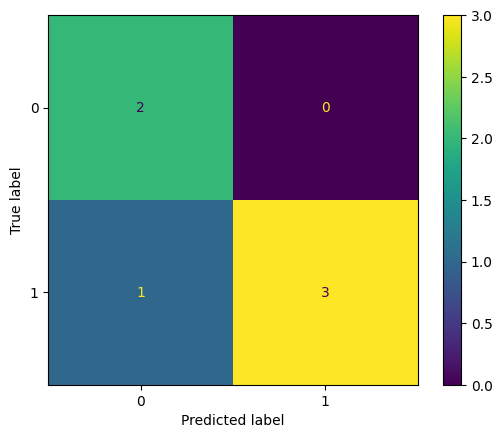

In [254]:
ConfusionMatrixDisplay(cm).plot()

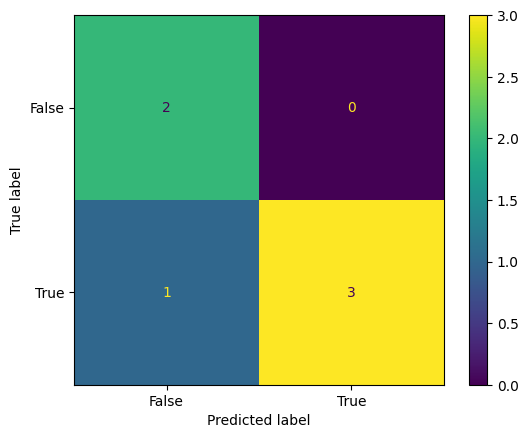

In [255]:
ConfusionMatrixDisplay(cm, display_labels=['False', 'True']).plot()

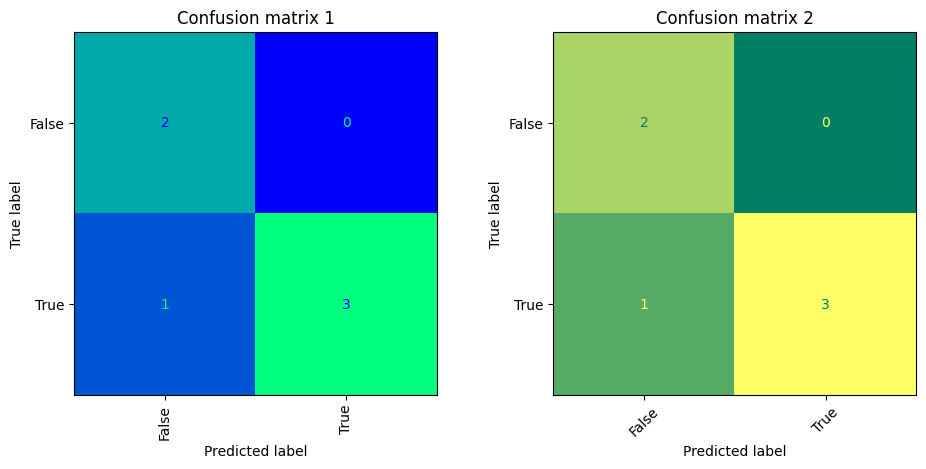

In [256]:
figure, axes = plt.subplots(1, 2, figsize=(10, 5)) # sharey='row'

disp = ConfusionMatrixDisplay(cm, display_labels=['False', 'True'])

# plot options: colorbar, cmap, include_values, xticks_rotation

disp.plot(ax=axes[0], colorbar=False, cmap='winter', xticks_rotation="vertical")
disp.plot(ax=axes[1], colorbar=False, cmap='summer', xticks_rotation=45)

axes[0].set_title('Confusion matrix 1')
axes[1].set_title('Confusion matrix 2')

figure.tight_layout(pad=3.0)



### Metrics: success rate, error rate, precision, recall, sensitivity, specificity, F-measure

In [257]:
success_rate = (TP + TN) / (TP + FP + TN + FN)
error_rate = (FP + FN) / (TP + FP + TN + FN)
precision = TP/ (TP + FP)
recall = TP / (TP + FN)
sensitivity_TPR = TP / (TP + FN)
specificity_TNR = TN / (FP + TN)
f_measure = (2 * recall * precision)/(recall+precision)

print(f'Success rate: {round(success_rate, 2)}')
print(f'Error rate: {round(error_rate, 2)}')
print(f'Precision: {round(precision, 2)}')
print(f'Recall: {round(recall, 2)}')
print(f'Sensitivity: {round(sensitivity_TPR, 2)}')
print(f'Specificity: {round(specificity_TNR, 2)}')
print(f'F-measure: {round(f_measure, 2)}')

Success rate: 0.83
Error rate: 0.17
Precision: 1.0
Recall: 0.75
Sensitivity: 0.75
Specificity: 1.0
F-measure: 0.86


In [258]:
def calculate_evaluation(ground_truth, prediction):
  print(f'Success rate: {round(accuracy_score(ground_truth, prediction), 2)}')
  print(f'Error rate: {round(1-accuracy_score(ground_truth, prediction), 2)}')
  print(f'Precision: {round(precision_score(ground_truth, prediction), 2)}')
  print(f'Recall (Sensitivity): {round(recall_score(ground_truth, prediction), 2)}')
  print(f'Specificity: {round(recall_score(ground_truth, prediction, pos_label=0), 2)}')
  print(f'F-measure: {round(f1_score(ground_truth, prediction), 2)}')

calculate_evaluation(y_true, y_pred)

Success rate: 0.83
Error rate: 0.17
Precision: 1.0
Recall (Sensitivity): 0.75
Specificity: 1.0
F-measure: 0.86


### Precision - recall curve

In [259]:
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()

### ROC curve, AUC

AUC: 0.88


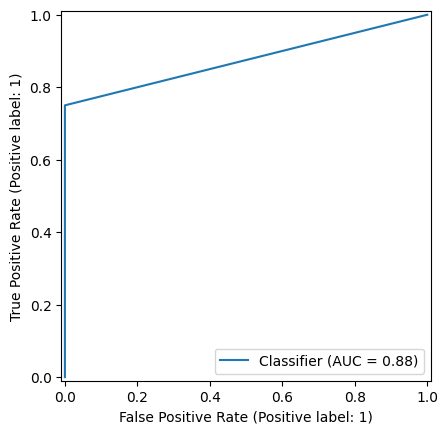

In [260]:
# Method 1

# calculate AUC
auc_score = roc_auc_score(y_true, y_pred)
print(f'AUC: {round(auc_score, 2)}')
display1 = RocCurveDisplay.from_predictions(y_true, y_pred)

AUC: 0.88


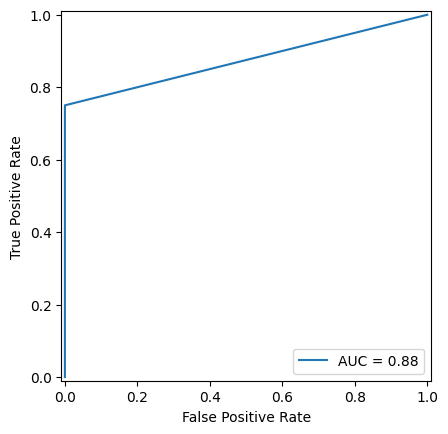

In [261]:
# Method 2
# calculate False Positive Rate and True Positive Rate
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# calculate AUC
roc_auc = auc(fpr, tpr)
print(f'AUC: {round(roc_auc, 2)}')

display2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

## Multiclass classification

### Confusion matrix

In [262]:
y_true_multiclass = [2, 0, 2, 2, 0, 1]
y_pred_multiclass = [0, 0, 2, 2, 0, 2]
cm_multiclass = confusion_matrix(y_true_multiclass, y_pred_multiclass)
cm_multiclass

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

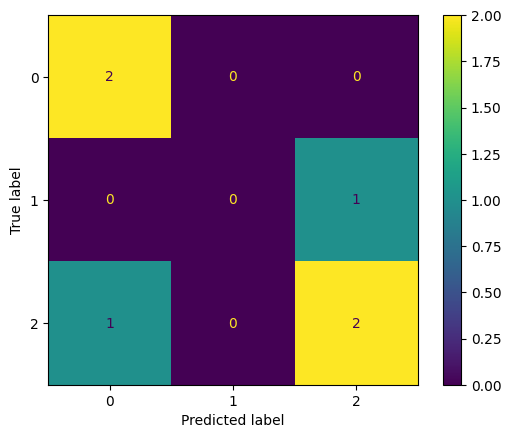

In [263]:
ConfusionMatrixDisplay(cm_multiclass).plot()

### Metrics

In [264]:
# some of the metrics will not work directly for multiclass classification
# calculate_evaluation(y_true_multiclass, y_pred_multiclass)

In [265]:
def calculate_evaluation_multiclass(ground_truth, prediction, average):
  print(f'Success rate: {round(accuracy_score(ground_truth, prediction), 2)}')
  print(f'Error rate: {round(1-accuracy_score(ground_truth, prediction), 2)}')
  print(f'Precision: {round(precision_score(ground_truth, prediction, average=average, zero_division=0), 2)}')
  print(f'Recall (Sensitivity): {round(recall_score(ground_truth, prediction, average=average), 2)}')
  print(f'Specificity: {round(recall_score(ground_truth, prediction, average=average), 2)}')
  print(f'F-measure: {round(f1_score(ground_truth, prediction, average=average), 2)}')

calculate_evaluation_multiclass(y_true_multiclass, y_pred_multiclass, average='weighted')

Success rate: 0.67
Error rate: 0.33
Precision: 0.56
Recall (Sensitivity): 0.67
Specificity: 0.67
F-measure: 0.6


## Wine dataset

In [266]:
data = pd.read_csv('wine_data.csv')
test_data = pd.read_csv('wine_data_test2.csv')

## 1R

In [267]:
"""
Prediction results based on the manual calculations:

If Type = rosé 		Then Popular = Yes (*arbitrary choice)
If Type = red 		Then Popular = Yes
If Type = white 	Then Popular = No
"""

preditions_1R = [
    'yes','yes','no',
    'yes','yes','no',
    'yes','yes','no',
    'yes','yes','no',
    'yes','yes','no',
    'yes','yes', 'no',
]

In [268]:
"""
Prediction results based on the code calculations:

Best Attribute: Type
Best Rule: {'rose': 'no', 'red': 'yes', 'white': 'no'}

If Type = rosé 		Then Popular = No (*arbitrary choice)
If Type = red 		Then Popular = Yes
If Type = white 	Then Popular = No
"""

preditions_1R_code = [
    'yes', 'no', 'no',
    'yes', 'no', 'no',
    'yes', 'no', 'no',
    'yes', 'no', 'no',
    'yes', 'no', 'no',
    'yes', 'no', 'no'
]

data_with_predictions = test_data.copy()
data_with_predictions['Prediction'] = preditions_1R
# data_with_predictions['Prediction'] = preditions_1R_code

In [269]:
def highligh_wrong_predictions(df, y_true, y_pred):
  style = pd.Series("background: salmon;", index=df[df[y_true] != df[y_pred]].index)
  display(df.style.apply(lambda s: style))

highligh_wrong_predictions(data_with_predictions, 'Popular', 'Prediction')

In [270]:
label_encoder = LabelEncoder()
label_encoder.fit(["no", "yes"])
y_true = label_encoder.transform(data_with_predictions['Popular'])
y_pred = label_encoder.transform(data_with_predictions['Prediction'])

calculate_evaluation(y_true, y_pred)

Success rate: 0.67
Error rate: 0.33
Precision: 0.83
Recall (Sensitivity): 0.5
Specificity: 0.88
F-measure: 0.62


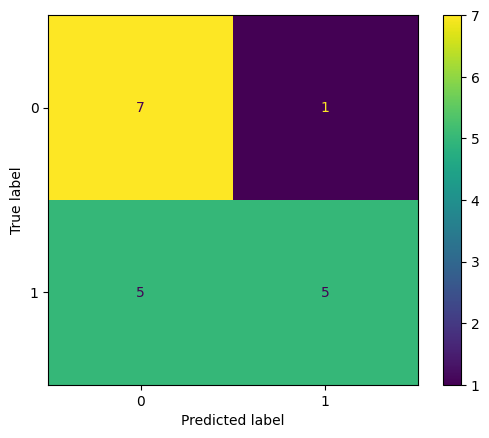

In [271]:
ConfusionMatrixDisplay(confusion_matrix(data_with_predictions['Popular'], data_with_predictions['Prediction'])).plot()

## Naive Bayes

In [272]:
import encoding

In [273]:
def split_data(data, class_name):
    y = data[class_name]
    x = data.drop(columns=[class_name])
    return x, y

In [274]:
X, Y = split_data(data, 'Popular')
X, encoders = encoding.encode_data(X, X.columns)

model = CategoricalNB().fit(X, Y)

X_test, Y_test = split_data(test_data, 'Popular')

X_test, encoders = encoding.encode_data(X_test, X_test.columns, encoders)
probabilities = model.predict_proba(X_test)
predictions = model.predict(X_test)

print(f"The predicted probabilites and classes:\n")
for probability, prediction in zip(probabilities, predictions):
  print(probability, prediction)

The predicted probabilites and classes:

[0.45064378 0.54935622] yes
[0.52238806 0.47761194] no
[0.76642336 0.23357664] no
[0.55166375 0.44833625] no
[0.62130178 0.37869822] no
[0.83113456 0.16886544] no
[0.45064378 0.54935622] yes
[0.52238806 0.47761194] no
[0.76642336 0.23357664] no
[0.3808948 0.6191052] yes
[0.45064378 0.54935622] yes
[0.71106095 0.28893905] no
[0.47993906 0.52006094] yes
[0.55166375 0.44833625] no
[0.7868443 0.2131557] no
[0.3808948 0.6191052] yes
[0.45064378 0.54935622] yes
[0.71106095 0.28893905] no


In [275]:
data_with_predictions = test_data.copy()
data_with_predictions['Prediction'] = predictions
highligh_wrong_predictions(data_with_predictions, 'Popular', 'Prediction')

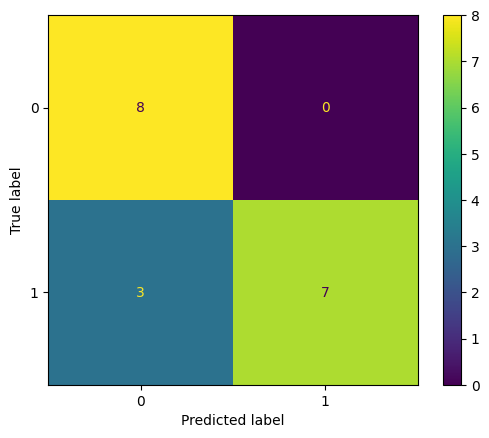

In [276]:
ConfusionMatrixDisplay(confusion_matrix(data_with_predictions['Popular'], data_with_predictions['Prediction'])).plot()

In [277]:
label_encoder = LabelEncoder()
label_encoder.fit(["no", "yes"])
y_true = label_encoder.transform(data_with_predictions['Popular'])
y_pred = label_encoder.transform(data_with_predictions['Prediction'])

calculate_evaluation(y_true, y_pred)

Success rate: 0.83
Error rate: 0.17
Precision: 1.0
Recall (Sensitivity): 0.7
Specificity: 1.0
F-measure: 0.82


## Decision Trees



In [278]:
from sklearn.tree import DecisionTreeClassifier

X, Y = split_data(data, 'Popular')
X, encoders = encoding.encode_data(X, X.columns)

X_test, Y_test = split_data(test_data, 'Popular')
X_test, encoders = encoding.encode_data(X_test, X_test.columns)

clf = DecisionTreeClassifier(random_state=42)
model = clf.fit(X, Y)

predictions = clf.predict(X_test)
probabilities = clf.predict_proba(X_test)[:,1]

data_with_predictions = test_data.copy()
data_with_predictions['Prediction'] = predictions
highligh_wrong_predictions(data_with_predictions, 'Popular', 'Prediction')

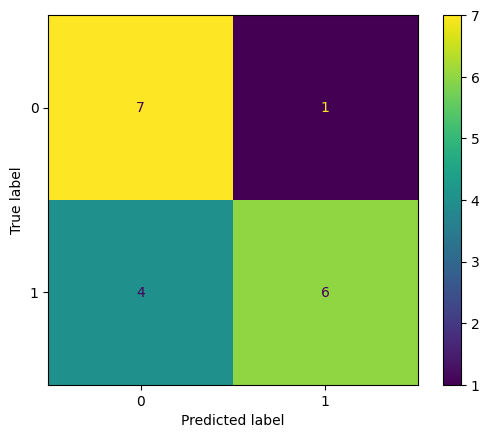

In [279]:
ConfusionMatrixDisplay(confusion_matrix(data_with_predictions['Popular'], data_with_predictions['Prediction'])).plot()

In [280]:
label_encoder = LabelEncoder()
label_encoder.fit(["no", "yes"])
y_true = label_encoder.transform(data_with_predictions['Popular'])
y_pred = label_encoder.transform(data_with_predictions['Prediction'])

calculate_evaluation(y_true, y_pred)

Success rate: 0.72
Error rate: 0.28
Precision: 0.86
Recall (Sensitivity): 0.6
Specificity: 0.88
F-measure: 0.71


## Cross validation

### Holdout

#### Example 1

In [292]:
data = pd.read_csv('wine_data.csv')

Y = data['Popular']
X = data.drop(columns=['Popular'])

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [294]:
X_train

Alcohol_content   Sweetness   Type
8            high         dry    red
6            high  semi-sweet    red
3            high       sweet   rose
0             low       sweet   rose
5             low       sweet  white

In [295]:
X_test

Alcohol_content   Sweetness   Type
7            high       sweet    red
2             low  semi-sweet    red
1             low         dry    red
4             low         dry  white

#### Example 2

In [296]:
X, Y = make_classification(n_features=2, n_redundant=0, random_state=12)

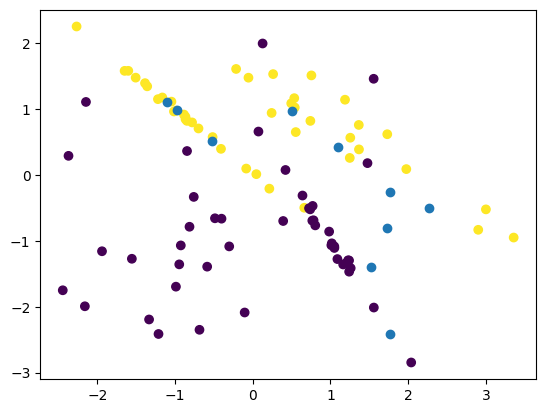

In [297]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=False)

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
plt.scatter(X_test[:, 0], X_test[:, 1])

### Cross Validation

In [287]:
from sklearn.model_selection import cross_validate as cv

cv_results = cv(clf, X_train, Y_train, cv=5)
print(cv_results['test_score'])

[0.77777778 0.77777778 0.66666667 0.88888889 0.88888889]


### K-Fold Cross-Validation

In [288]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[2 3]
  Test:  index=[0 1]
Fold 1:
  Train: index=[0 1]
  Test:  index=[2 3]


In [289]:
X, Y = make_classification(n_features=2, n_redundant=0, random_state=12)

model=DecisionTreeClassifier()
kfold_validation=KFold(10)

results = cross_val_score(model, X, Y, cv=kfold_validation)

print(results)
print(round(np.mean(results), 2))

[0.8 0.7 0.7 0.7 0.9 1.  0.8 0.9 0.8 0.8]
0.81


### Leave-one-out

In [290]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])

loo = LeaveOneOut()
for i, (train_index, test_index) in enumerate(loo.split(X)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[1 2 3]
  Test:  index=[0]
Fold 1:
  Train: index=[0 2 3]
  Test:  index=[1]
Fold 2:
  Train: index=[0 1 3]
  Test:  index=[2]
Fold 3:
  Train: index=[0 1 2]
  Test:  index=[3]


In [291]:
kf = KFold(n_splits=len(X))
for i, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[1 2 3]
  Test:  index=[0]
Fold 1:
  Train: index=[0 2 3]
  Test:  index=[1]
Fold 2:
  Train: index=[0 1 3]
  Test:  index=[2]
Fold 3:
  Train: index=[0 1 2]
  Test:  index=[3]
